In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/boston-housing-dataset/BostonHousing.csv


In [2]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
df = df.fillna(0)

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [5]:
def model(X, w, b):
    return X @ w + b

def mse(yhat, y):
    return (np.sum((y - yhat)**2)) / len(y)

## Differentiating the MSE and calculating the derivatives by hand

$$\large MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Differentiating w.r.t to the weights**

Let start calculating the derivate of the MSE function using calculus with respect to the weights and the biases both. Let's say that using Power Rule we will get

$$\frac{dy}{dw} =  \frac{1}{n} \sum_{i=1}^{n} \space 2{y_{i} - \hat{y}_{i}}$$

Now we will have to differentiate the term $y_{i} - \hat{y}_{i}$. $y_{i}$ are constant values and constant values when differentiating become zero. We know from earlier that $\hat{y}_{i} = mx + b$ so we can substitute this value and we will get 

$$\frac{d}{dw} y_{i} - \hat{y}_{i} =  0 - (m * x + b)$$


whicch can then be simplified as 

$$\frac{d}{dw}  y_{i} - \hat{y}_{i} =  0 - (1 * x + 0)$$

because $m$ and $w$ are the same thing and $b$ here is just another constant value so 

$$\frac{d}{dw}  y_{i} - \hat{y}_{i} =  -x $$

Finally our derivative with respect to the weights will be 


$$\frac{dy}{dw} =  \frac{-2}{n} \sum_{i=1}^{n} \space ({y_{i} - \hat{y}_{i}}) \space {x}$$

**Differentiating w.r.t to the bias**

Let start calculating the derivate of the MSE function using calculus with respect to the weights and the biases both. Let's say that using Power Rule we will get

$$\frac{dy}{dw} =  \frac{1}{n} \sum_{i=1}^{n} \space 2{y_{i} - \hat{y}_{i}}$$

Now we will have to differentiate the term $y_{i} - \hat{y}_{i}$. $y_{i}$ are constant values and constant values when differentiating become zero. We know from earlier that $\hat{y}_{i} = mx + b$ so we can substitute this value and we will get 

$$\frac{d}{dw} y_{i} - \hat{y}_{i} =  0 - (m * x + b)$$


which can then be simplified as 

$$\frac{d}{dw}  y_{i} - \hat{y}_{i} =  0 - (0 + 1)$$

because whenever a third term comes into the equation, we zero it out and here $m$ and $x$ are the third terms since we are differentiating the cost with respect to $b$ so now

$$\frac{d}{dw}  y_{i} - \hat{y}_{i} =  -1 $$

Finally our derivative with respect to the weights will be 


$$\frac{dy}{dw} =  \frac{-2}{n} \sum_{i=1}^{n} \space ({y_{i} - \hat{y}_{i}}$$


**Final derivative**

$$\frac{\partial{y}}{\partial{x}_{b}} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$

and 

$$\frac{\partial{y}}{\partial{x}_{w}} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) * x$$



In [6]:
def derivative(yhat, y, x):
    n = len(y)
    error = yhat - y
    derivative_w = -2/n * np.dot((y - yhat), x)
    derivative_b = -2/n * sum(y - yhat)
    return derivative_w, derivative_b

In [7]:
scaledX = (X - X.min())/ (X.max()- X.min())
scaledY = (y - y.min())/ (y.max()- y.min())

In [8]:
w = np.random.random(scaledX.shape[1])
b = np.random.random(1)
learning_rate = 0.001
print("Before Training : ")
print(f"Weights : {w}, Bias  {b}")

# Lists to store error values and iteration numbers
errors = []
iterations = []

for i in range(1000):
    
    preds = model(scaledX, w, b)
    error = mse(preds, y)
    gradient_w, gradient_b = derivative(preds, y, scaledX)
    w = w - learning_rate * gradient_w
    b = b - learning_rate * gradient_b
    
    # Append error and iteration number to lists
    errors.append(error)
    iterations.append(i)
    
print("-"*80)
print("After Training : ")
print(f"Weights : {w}, Bias  {b}")

Before Training : 
Weights : [0.23676387 0.05780102 0.03306634 0.33335887 0.08428358 0.80553076
 0.80901233 0.30242959 0.47378747 0.62537763 0.92235424 0.33085612
 0.65225539], Bias  [0.77134145]
--------------------------------------------------------------------------------
After Training : 
Weights : [0.20704768 0.5030197  0.14165807 0.33579138 0.09310021 0.93435315
 1.76924826 0.38901973 0.54596952 5.73137263 1.23322267 7.68011767
 0.74230202], Bias  [13.94114462]


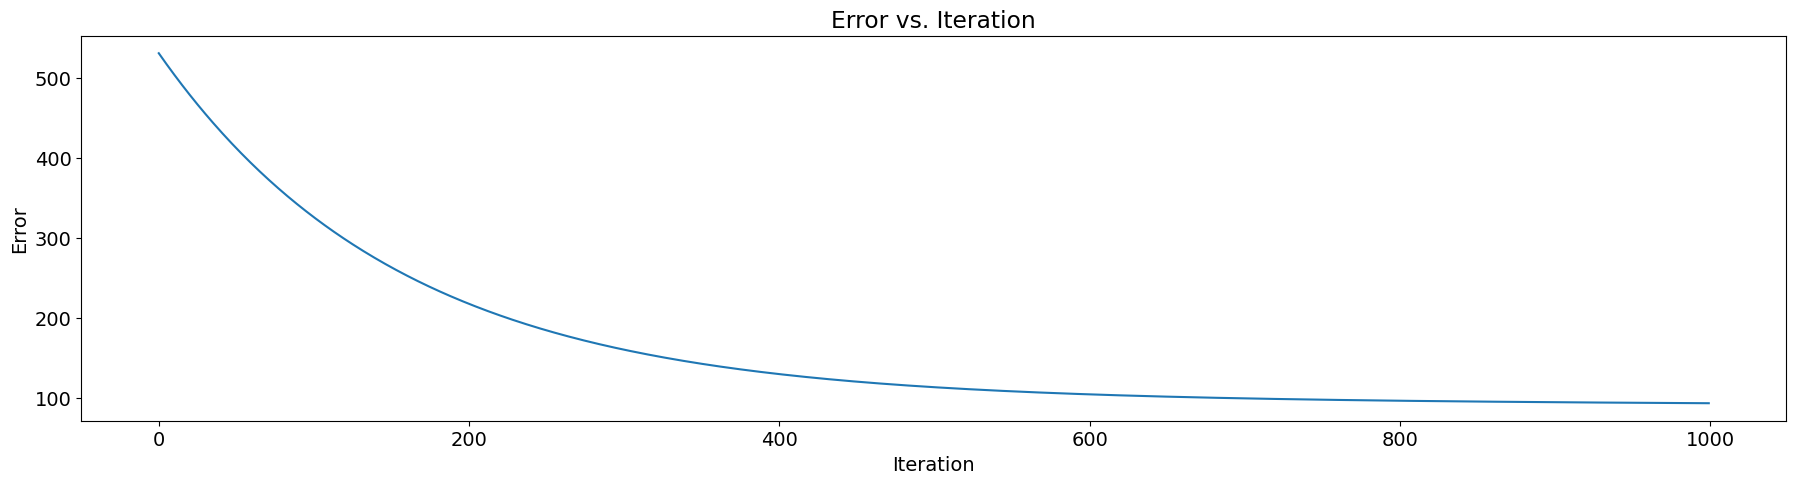

In [9]:
# Plot the error vs. iteration
plt.plot(iterations, errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs. Iteration')
plt.show()